## Download annotation files to new directory

Please see supplemental tables for where to download files.

## Intersect with annotations

### ENCODE cCREs (`v3` and `v4`), all biosamples, direction intersection

#### v3, Perturbed

In [2]:
%%bash
module load bedtools2

bedtools intersect \
-b allmeta/elementReference/combined/binnedgenome.int.elementReference.20230619.merge.bed \
-a annotations/encode.ccres.v3.hg38.bed \
-wa -u | wc -l 

38809


#### v3, Significant

In [3]:
%%bash
module load bedtools2

bedtools intersect \
-b allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-a annotations/encode.ccres.v3.hg38.bed \
-wa -u | wc -l

2058


#### v4, Perturbed

In [4]:
%%bash
module load bedtools2

bedtools intersect \
-b allmeta/elementReference/combined/binnedgenome.int.elementReference.20230619.merge.bed \
-a annotations/encode.ccres.v4.hg38.bed.gz \
-wa -u | wc -l

53197


#### v4, Significant

In [5]:
%%bash
module load bedtools2

bedtools intersect \
-b allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-a annotations/encode.ccres.v4.hg38.bed.gz \
-wa -u | wc -l

2547


#### For v4, get the number of cCREs per region perturbed or significant

In [7]:
%%bash
module load bedtools2

bedtools intersect \
-a allmeta/elementReference/combined/binnedgenome.int.elementReference.20230619.merge.bed \
-b annotations/encode.ccres.v4.hg38.bed.gz \
-c > allmeta/outs/binnedgenome.int.elementReference.20230619.merge.int.cCREs.count.txt

In [8]:
%%bash
module load bedtools2

bedtools intersect \
-a allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-b annotations/encode.ccres.v4.hg38.bed.gz \
-c > allmeta/outs/binnedgenome.int.elementQuant.20230411.merge.int.cCREs.count.txt

#### Calculate percent of cCREs perturbed and percent of perturbed cCREs that overlapped a significant element

In [9]:
53197/2348854*100

2.2648065822737387

In [10]:
2547/53197*100

4.787863977291953

#### Plot distribution of cCREs per perturbed and per significant element

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df1 = pd.read_csv('allmeta/outs/binnedgenome.int.elementReference.20230619.merge.int.cCREs.count.txt',
                   sep='\t', header = None)

df1.columns = ['chr', 'start', 'end', 'cCRE_count']
df1['region_type'] = "perturbed"
df1.head()

,chr,start,end,cCRE_count,region_type
0,chr1,975500,976600,3,perturbed
1,chr1,1023900,1025700,5,perturbed
2,chr1,1032200,1033100,2,perturbed
3,chr1,1041000,1042300,4,perturbed
4,chr1,1062900,1063800,3,perturbed


In [12]:
df2 = pd.read_csv('allmeta/outs/binnedgenome.int.elementQuant.20230411.merge.int.cCREs.count.txt',
                   sep='\t', header = None)

df2.columns = ['chr', 'start', 'end', 'cCRE_count']
df2['region_type'] = "significant"
df2.head()

,chr,start,end,cCRE_count,region_type
0,chr1,1411500,1411800,2,significant
1,chr1,3675300,3676000,3,significant
2,chr1,6475300,6475700,2,significant
3,chr1,6859300,6861400,4,significant
4,chr1,8049700,8050700,1,significant


In [13]:
plotdf = pd.concat([df1, df2], sort = False)
plotdf.head()

,chr,start,end,cCRE_count,region_type
0,chr1,975500,976600,3,perturbed
1,chr1,1023900,1025700,5,perturbed
2,chr1,1032200,1033100,2,perturbed
3,chr1,1041000,1042300,4,perturbed
4,chr1,1062900,1063800,3,perturbed


In [14]:
plotdf[["cCRE_count","region_type"]].groupby('region_type').describe()

cCRE_count                                               
                 count      mean       std  min  25%  50%  75%    max
region_type                                                          
perturbed      20678.0  2.614953  4.328342  0.0  1.0  2.0  3.0  236.0
significant      865.0  2.949133  3.168450  0.0  1.0  2.0  3.0   32.0

Presumably the perturbed regions with many (>100 cCREs) are tiling screens (and after merging adjacent regions), the majority of the locus is targeted.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2ae5efec5748>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

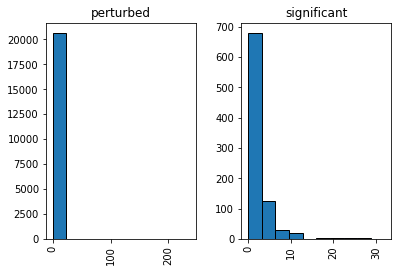

In [15]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plotdf['cCRE_count'].hist(by=plotdf['region_type'], edgecolor='black') 

### ENCODE cCREs (only `v4`), all biosamples, window +/- 100bp

#### v4, Perturbed

In [24]:
%%bash
module load bedtools2

bedtools window \
-b allmeta/elementReference/combined/binnedgenome.int.elementReference.20230619.merge.bed \
-a annotations/encode.ccres.v4.hg38.bed.gz \
-w 100 | wc -l

60950


#### v4, Significant

In [25]:
%%bash
module load bedtools2

bedtools window \
-b allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-a annotations/encode.ccres.v4.hg38.bed.gz \
-w 100 | wc -l

2842


#### For v4, get the number of cCREs per region perturbed or significant

In [26]:
%%bash
module load bedtools2

bedtools window \
-a allmeta/elementReference/combined/binnedgenome.int.elementReference.20230619.merge.bed \
-b annotations/encode.ccres.v4.hg38.bed.gz \
-c -w 100 > allmeta/outs/binnedgenome.int.elementReference.20230619.merge.window100.cCREs.count.txt

In [27]:
%%bash
module load bedtools2

bedtools window \
-a allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-b annotations/encode.ccres.v4.hg38.bed.gz \
-c -w 100 > allmeta/outs/binnedgenome.int.elementQuant.20230411.merge.window100.cCREs.count.txt

#### Calculate percent of cCREs perturbed and percent of perturbed cCREs that overlapped a significant element

In [28]:
60950/2348854*100

2.594882440543346

In [29]:
2842/60950*100

4.6628383921246925

#### Plot distribution of cCREs per perturbed and per significant element

In [30]:
df1 = pd.read_csv('allmeta/outs/binnedgenome.int.elementReference.20230619.merge.window100.cCREs.count.txt',
                   sep='\t', header = None)

df1.columns = ['chr', 'start', 'end', 'cCRE_count']
df1['region_type'] = "perturbed"
df1.head()

,chr,start,end,cCRE_count,region_type
0,chr1,975500,976600,3,perturbed
1,chr1,1023900,1025700,5,perturbed
2,chr1,1032200,1033100,3,perturbed
3,chr1,1041000,1042300,4,perturbed
4,chr1,1062900,1063800,4,perturbed


In [31]:
df2 = pd.read_csv('allmeta/outs/binnedgenome.int.elementQuant.20230411.merge.window100.cCREs.count.txt',
                   sep='\t', header = None)

df2.columns = ['chr', 'start', 'end', 'cCRE_count']
df2['region_type'] = "significant"
df2.head()

,chr,start,end,cCRE_count,region_type
0,chr1,1411500,1411800,2,significant
1,chr1,3675300,3676000,3,significant
2,chr1,6475300,6475700,2,significant
3,chr1,6859300,6861400,5,significant
4,chr1,8049700,8050700,1,significant


In [32]:
plotdf = pd.concat([df1, df2], sort = False)
plotdf.head()

,chr,start,end,cCRE_count,region_type
0,chr1,975500,976600,3,perturbed
1,chr1,1023900,1025700,5,perturbed
2,chr1,1032200,1033100,3,perturbed
3,chr1,1041000,1042300,4,perturbed
4,chr1,1062900,1063800,4,perturbed


In [33]:
plotdf[["cCRE_count","region_type"]].groupby('region_type').describe()

cCRE_count                                               
                 count      mean       std  min  25%  50%  75%    max
region_type                                                          
perturbed      20678.0  2.947577  4.352138  0.0  2.0  3.0  4.0  237.0
significant      865.0  3.285549  3.209230  0.0  2.0  3.0  4.0   32.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2ae5f0878048>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

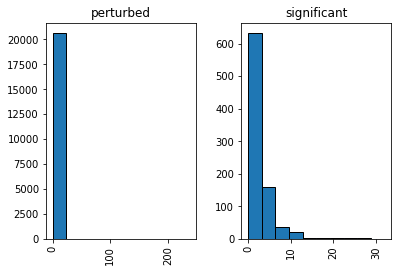

In [34]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plotdf['cCRE_count'].hist(by=plotdf['region_type'], edgecolor='black') 

### Intersect with union DHSs

File downloaded 2022-04-30 from UCSC table browser. <br>
Notebook to prepare bed file: `20220430.encode.Figure1MetaAnalysis.AnnotationFiles.LRB`

In [52]:
# %%bash
# cd annotations
# gunzip wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz
# wc -l wgEncodeRegDnaseClustered.full.bed.hg38.bed
# gzip wgEncodeRegDnaseClustered.full.bed.hg38.bed

In [39]:
%%bash
module load bedtools2

bedtools intersect \
-b allmeta/elementReference/combined/binnedgenome.int.elementReference.20230619.merge.bed \
-a annotations/wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz \
-wa -u | wc -l

44780


In [40]:
%%bash
module load bedtools2

bedtools intersect \
-b allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-a annotations/wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz \
-wa -u | wc -l

2072


In [41]:
44780/2113371*100

2.118889679095625

In [42]:
2072/44780*100

4.62706565430996

In [1]:
%%bash
module load bedtools2

bedtools intersect \
-a allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-b annotations/wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz \
-v | wc -l

53


### Compare overlap with pELS and pDLS cCREs

These two cCRE types have DNase and H3K27ac and/or CTCF.

#### Download v4 cCREs classified as pELS and pDLS

In [ ]:
# %%bash
# wget -O GRCh38-pELS.V4.bed.gz http://users.wenglab.org/moorej3/Registry-cCREs-WG/V4-Files/GRCh38-pELS.V4.bed.gz --no-check-certificate
# wget -O GRCh38-dELS.V4.bed.gz http://users.wenglab.org/moorej3/Registry-cCREs-WG/V4-Files/GRCh38-dELS.V4.bed.gz --no-check-certificate

#### Number of CREs that do not directly overlap a pELS or pDLS cCRE

In [3]:
%%bash
cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/
gunzip GRCh38-dELS.V4.bed.gz
gunzip GRCh38-pELS.V4.bed.gz

cat GRCh38-pELS.V4.bed GRCh38-dELS.V4.bed > temp.bed

gzip GRCh38-pELS.V4.bed
gzip GRCh38-dELS.V4.bed

sort -k1,1 -k2,2n temp.bed > temp.sorted.bed

module load bedtools2

bedtools merge -i temp.sorted.bed > temp.sorted.merge.bed
wc -l temp.sorted.merge.bed

bedtools intersect \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-b temp.sorted.merge.bed \
-v | wc -l

rm temp*.bed

1712866 temp.sorted.merge.bed
66


#### Number of CREs that do not directly overlap a pELS or pDLS cCRE or DNase peak in the union set (across 95 biosamples)

In [5]:
%%bash
cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/
gunzip GRCh38-dELS.V4.bed.gz
gunzip GRCh38-pELS.V4.bed.gz

cat GRCh38-pELS.V4.bed GRCh38-dELS.V4.bed > temp.bed

gzip GRCh38-pELS.V4.bed
gzip GRCh38-dELS.V4.bed

sort -k1,1 -k2,2n temp.bed > temp.sorted.bed

module load bedtools2

bedtools merge -i temp.sorted.bed > temp.sorted.merge.bed
wc -l temp.sorted.merge.bed

bedtools intersect \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-b wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz \
-v | \
bedtools intersect \
-a stdin \
-b temp.sorted.merge.bed -v | wc -l

rm temp*.bed

1712866 temp.sorted.merge.bed
29


#### Number of CREs that do not are within +/- 500bp or +/- 1000bp of a pELS or pDLS cCRE

In [8]:
%%bash
cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/
gunzip GRCh38-dELS.V4.bed.gz
gunzip GRCh38-pELS.V4.bed.gz

cat GRCh38-pELS.V4.bed GRCh38-dELS.V4.bed > temp.bed

gzip GRCh38-pELS.V4.bed
gzip GRCh38-dELS.V4.bed

sort -k1,1 -k2,2n temp.bed > temp.sorted.bed

module load bedtools2

bedtools merge -i temp.sorted.bed > temp.sorted.merge.bed
wc -l temp.sorted.merge.bed

bedtools window \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-b temp.sorted.merge.bed \
-w 500 \
-v | wc -l

bedtools window \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-b temp.sorted.merge.bed \
-w 1000 \
-v | wc -l

rm temp*.bed

1712866 temp.sorted.merge.bed
18
10


#### Number of CREs that do not are within +/- 500bp of a DNase peak in the union set or a pELS or pDLS cCRE 

In [9]:
%%bash
cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/
gunzip GRCh38-dELS.V4.bed.gz
gunzip GRCh38-pELS.V4.bed.gz

cat GRCh38-pELS.V4.bed GRCh38-dELS.V4.bed > temp.bed

gzip GRCh38-pELS.V4.bed
gzip GRCh38-dELS.V4.bed

sort -k1,1 -k2,2n temp.bed > temp.sorted.bed

module load bedtools2

bedtools merge -i temp.sorted.bed > temp.sorted.merge.bed
wc -l temp.sorted.merge.bed

bedtools window \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-b wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz \
-w 500 -v | \
bedtools window \
-a stdin \
-b temp.sorted.merge.bed -w 500 -v | wc -l

rm temp*.bed

1712866 temp.sorted.merge.bed
3
